# Plotting and Images

## Plotting

`YT` provides an interface to two of the most common plotting routines in `yt`: `SlicePlot` and `ProjectionPlot`. Unlike other methods in `YT`, these return the native `yt` Python-based objects. This is mainly for convenience; it allows one to use all of the annotation and plot modification methods that hang off these objects. The API for these objects is the same as it is in `yt`, which can be found in the [`yt` plotting documentation](http://yt-project.org/doc/visualizing/plots.html).

We'll illustrate the plotting functionality with a `SlicePlot` as an example:

In [1]:
import YT
ds = YT.load("GasSloshing/sloshing_nomag2_hdf5_plt_cnt_0100")
slc = YT.SlicePlot(ds, "z", ["density","temperature"], width=(500.,"kpc"))

yt : [INFO     ] 2016-12-15 21:44:50,548 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-12-15 21:44:50,548 integer runtime parameter plotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-12-15 21:44:50,564 Parameters: current_time              = 7.89058001997e+16
yt : [INFO     ] 2016-12-15 21:44:50,564 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2016-12-15 21:44:50,564 Parameters: domain_left_edge          = [ -3.70272000e+24  -3.70272000e+24  -3.70272000e+24]
yt : [INFO     ] 2016-12-15 21:44:50,565 Parameters: domain_right_edge         = [  3.70272000e+24   3.70272000e+24   3.70272000e+24]
yt : [INFO     ] 2016-12-15 21:44:50,565 Parameters: cosmological_simulation   = 0.0
/Users/jzuhone/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment

__anon__

PyObject <yt.visualization.plot_window.AxisAlignedSlicePlot object at 0x31a9d1d90>
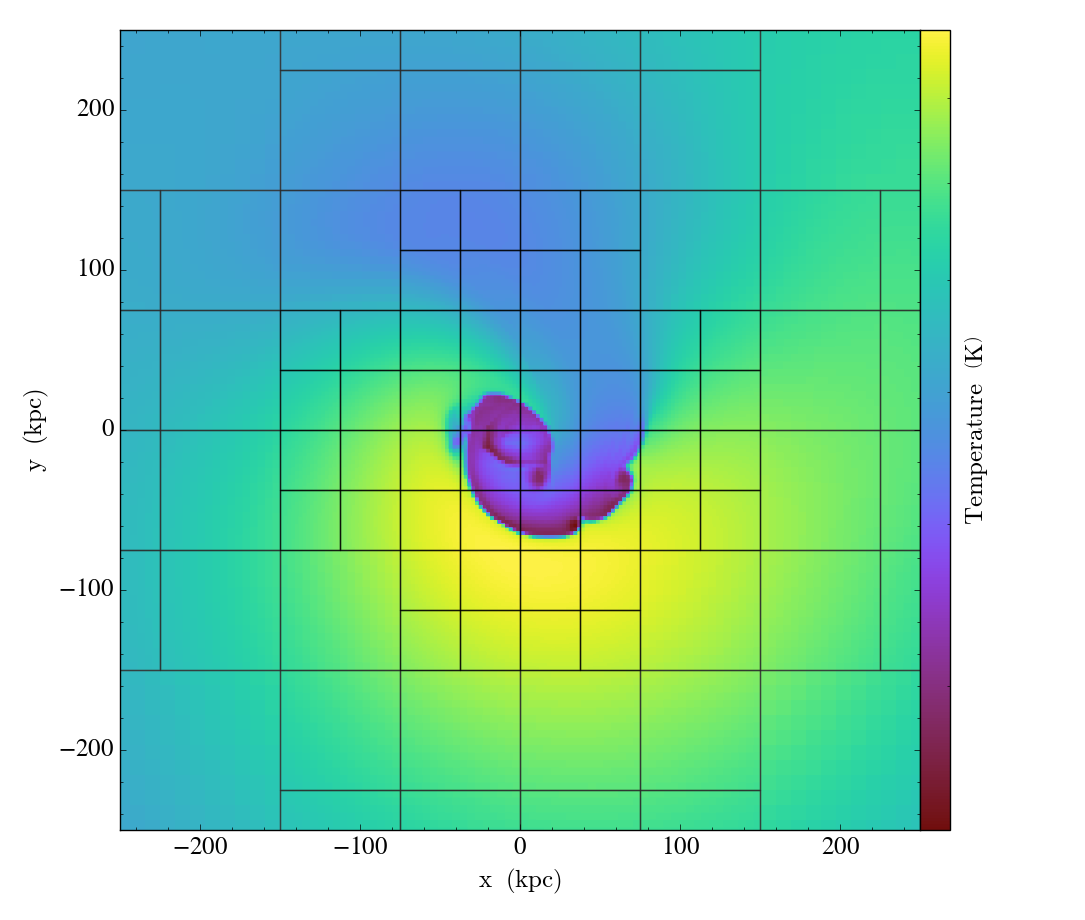
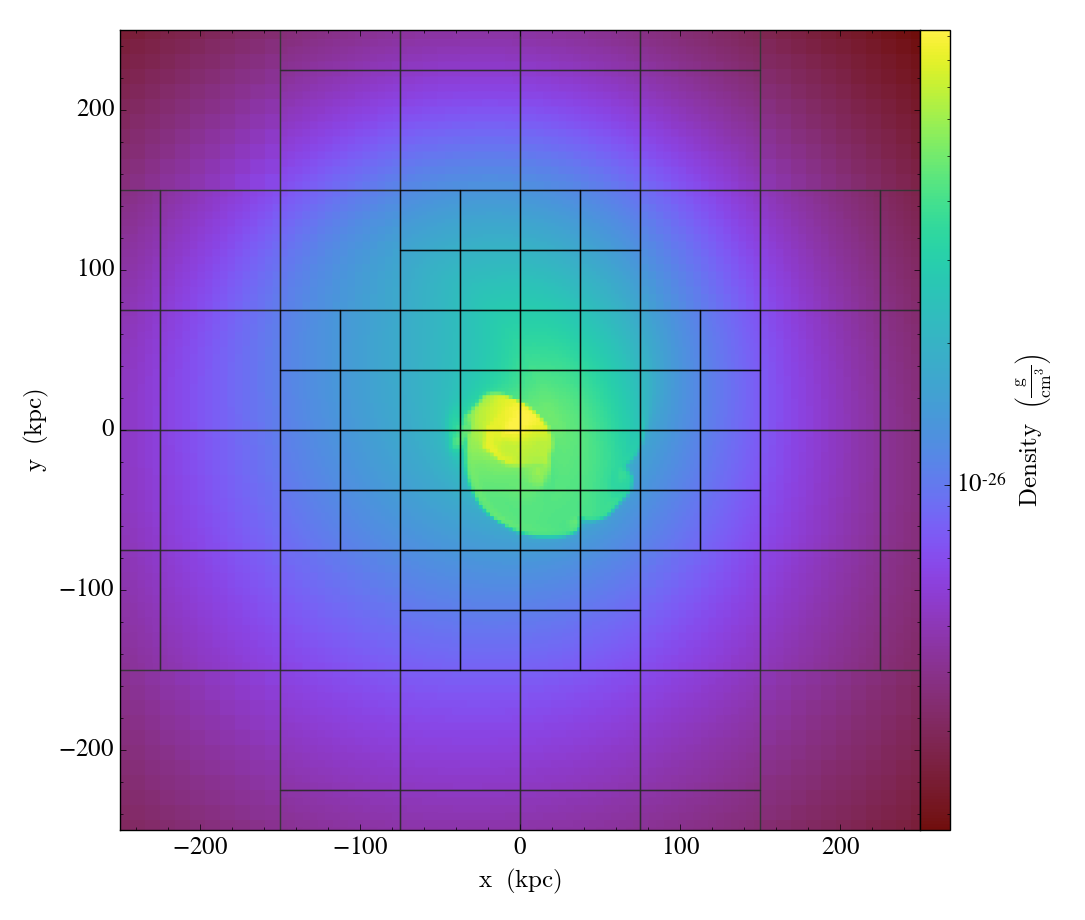

yt : [INFO     ] 2016-12-15 21:45:43,920 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2016-12-15 21:45:43,929 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [5]:
YT.show_plot(slc)

  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/jzuhone/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/jzuhone/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/jzuhone/.juli

PyObject <yt.visualization.plot_window.AxisAlignedSlicePlot object at 0x31a9d1d90>
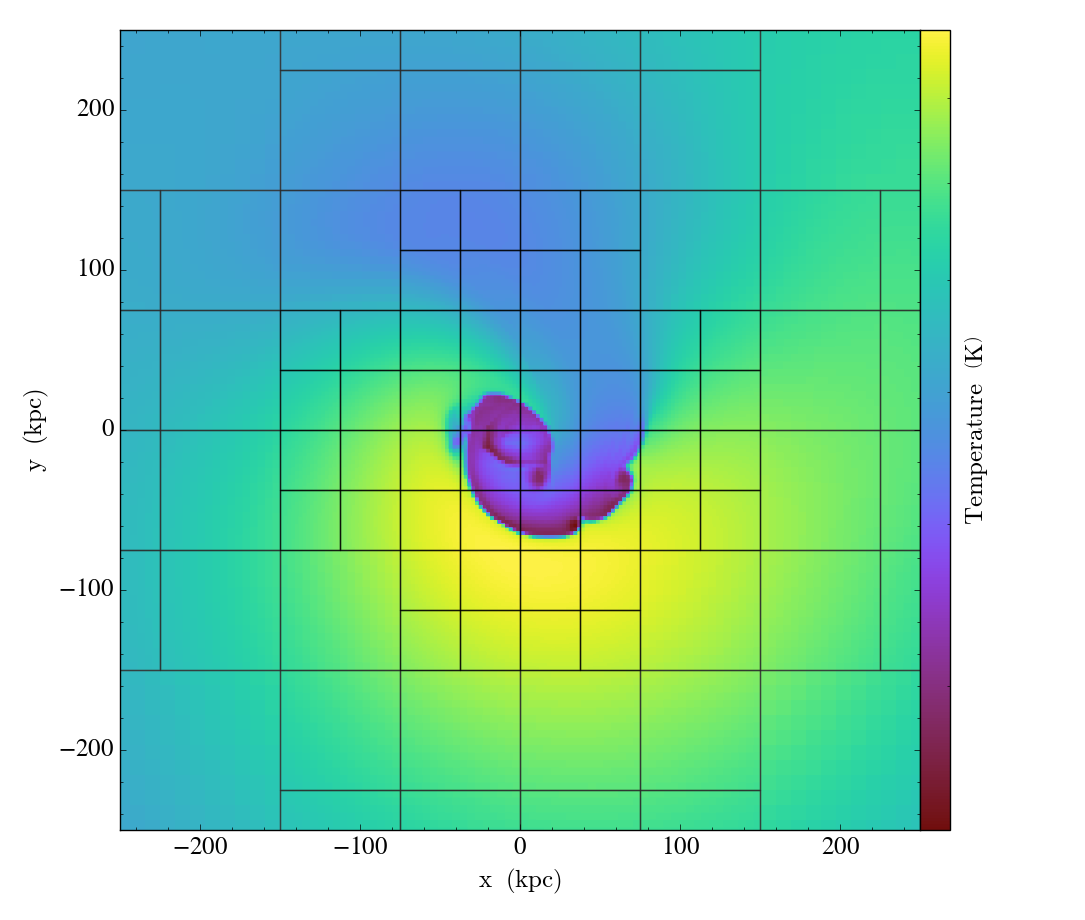
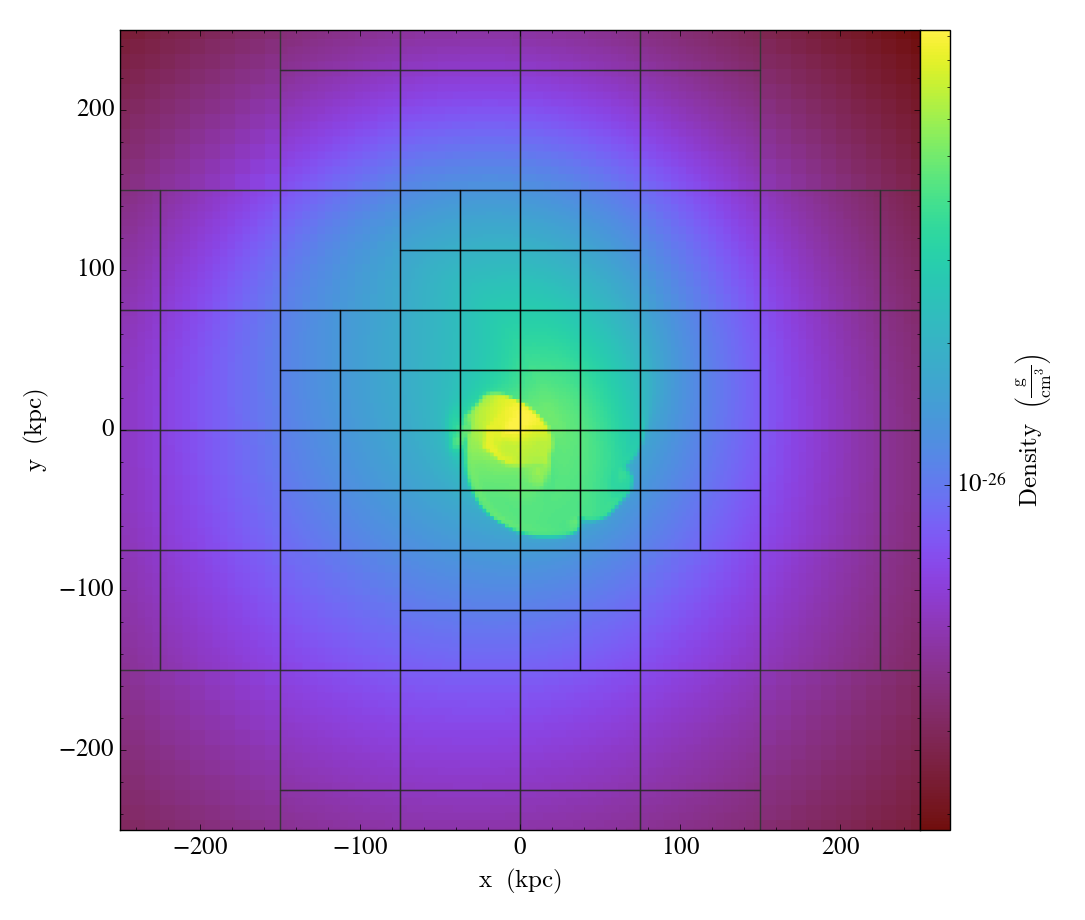

In [3]:
slc.annotate_grids()

In [ ]:
slc.refresh()

or velocity vectors:

PyObject <yt.visualization.plot_window.AxisAlignedSlicePlot object at 0x31a9d1d90>
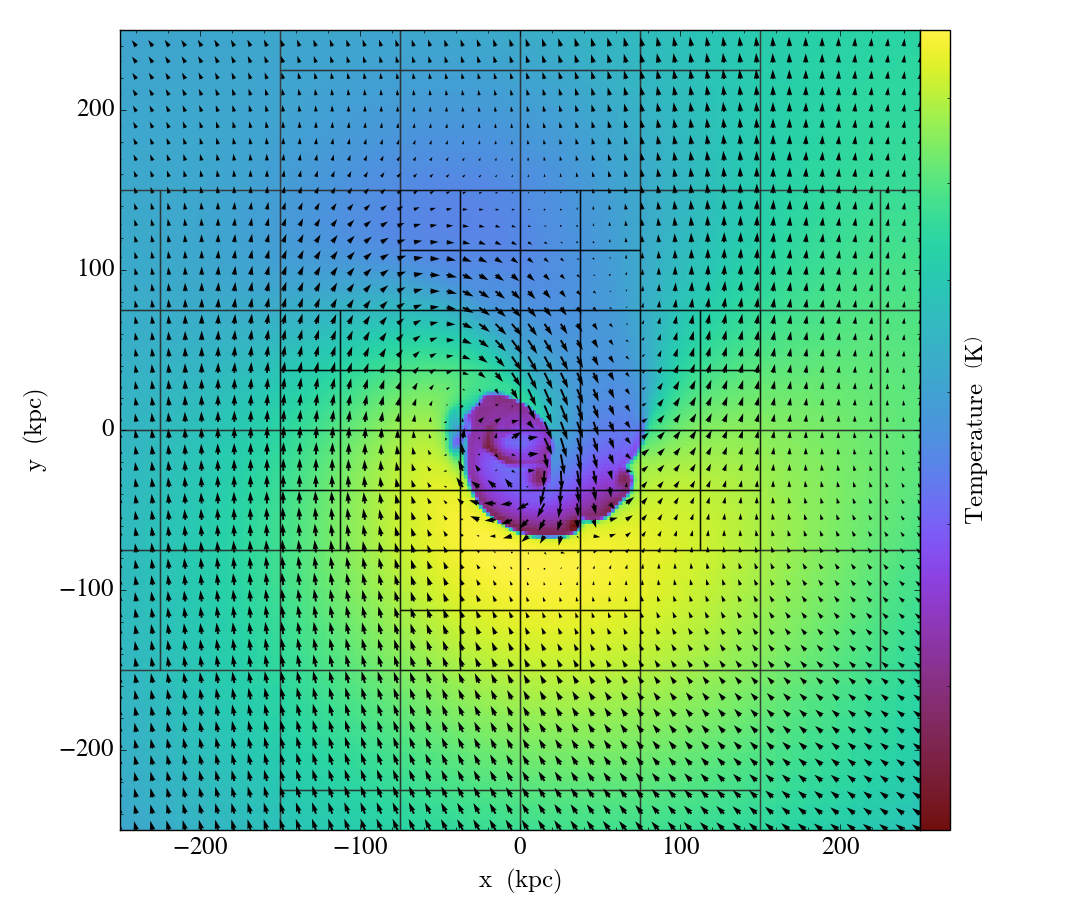
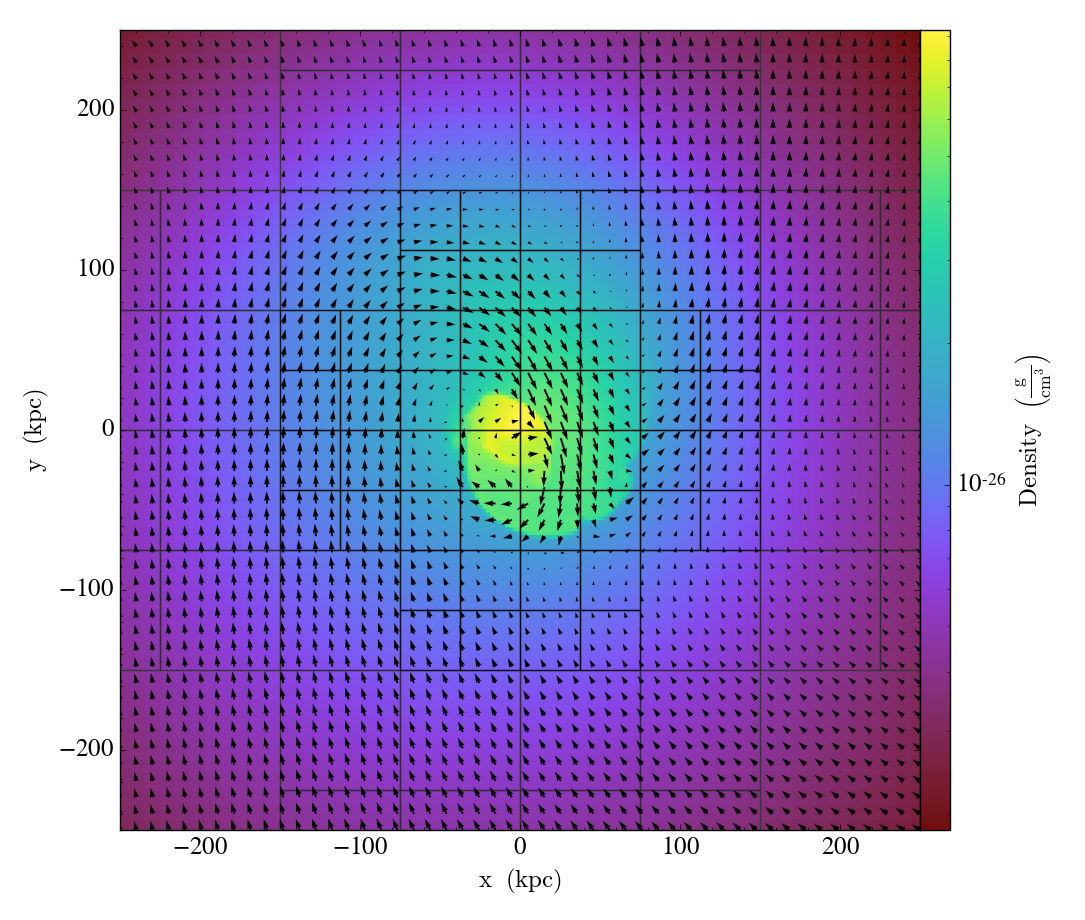

In [6]:
slc.annotate_velocity()

PyObject <yt.visualization.plot_window.AxisAlignedSlicePlot object at 0x31a9d1d90>
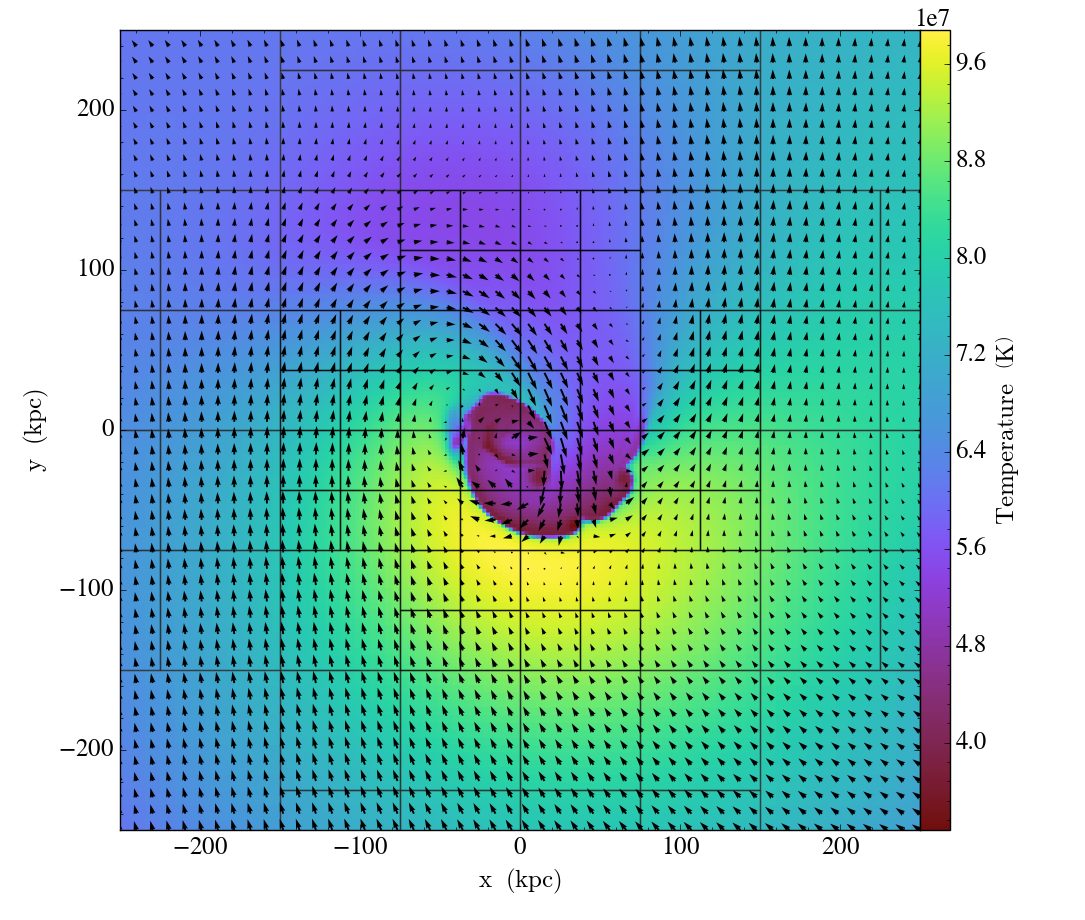
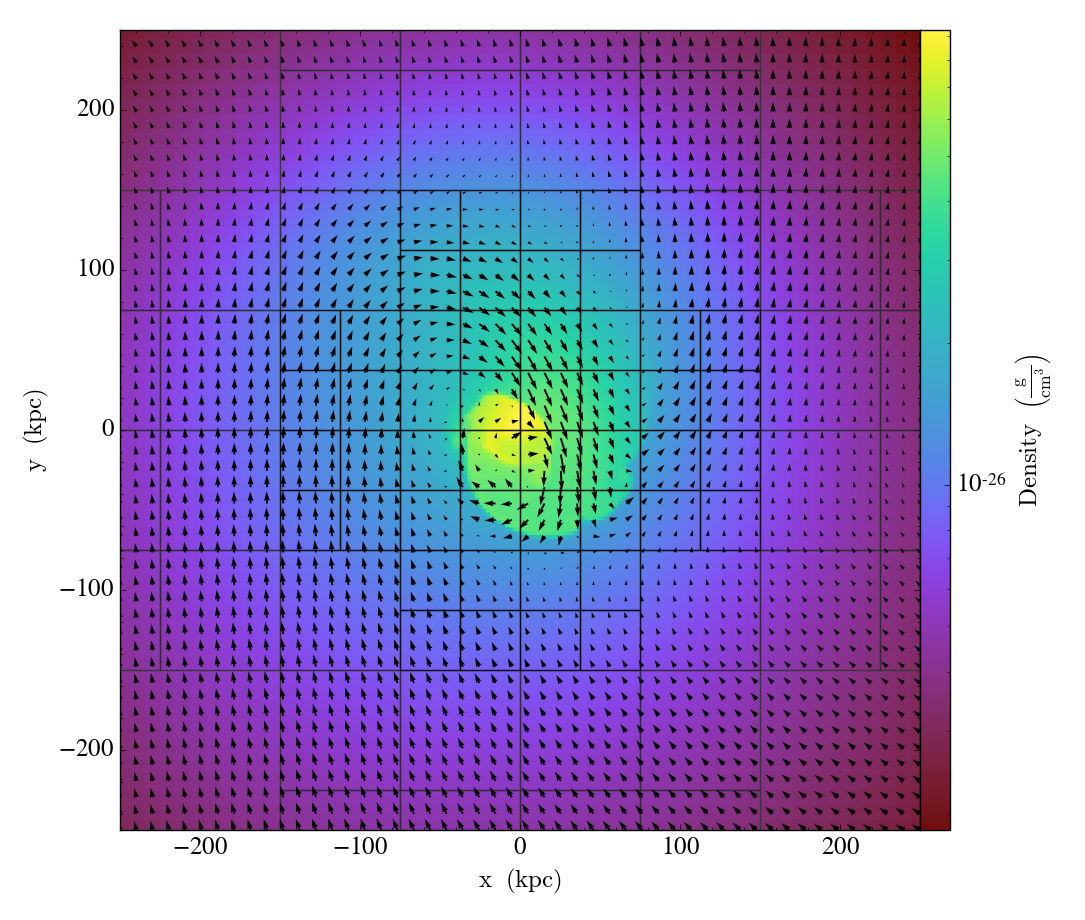

In [7]:
slc.set_log("temperature", false)

PyObject <yt.visualization.plot_window.AxisAlignedSlicePlot object at 0x31a9d1d90>
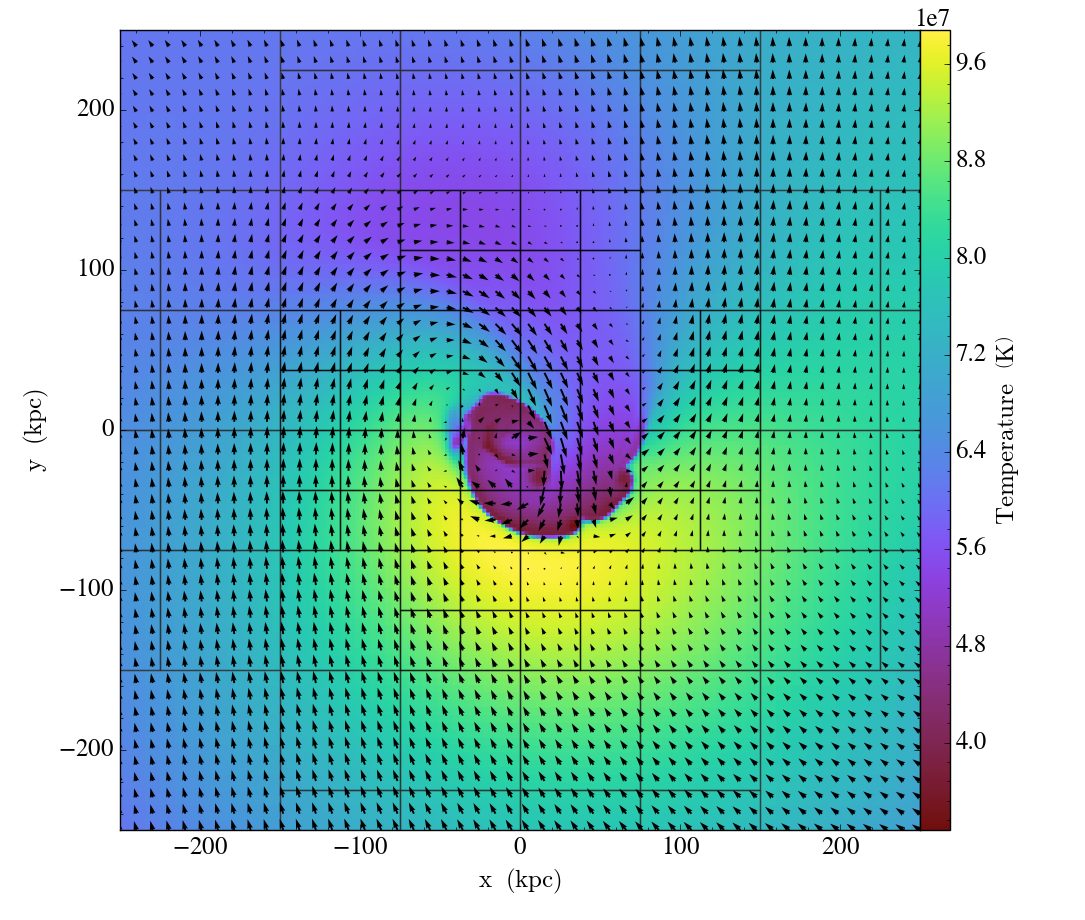
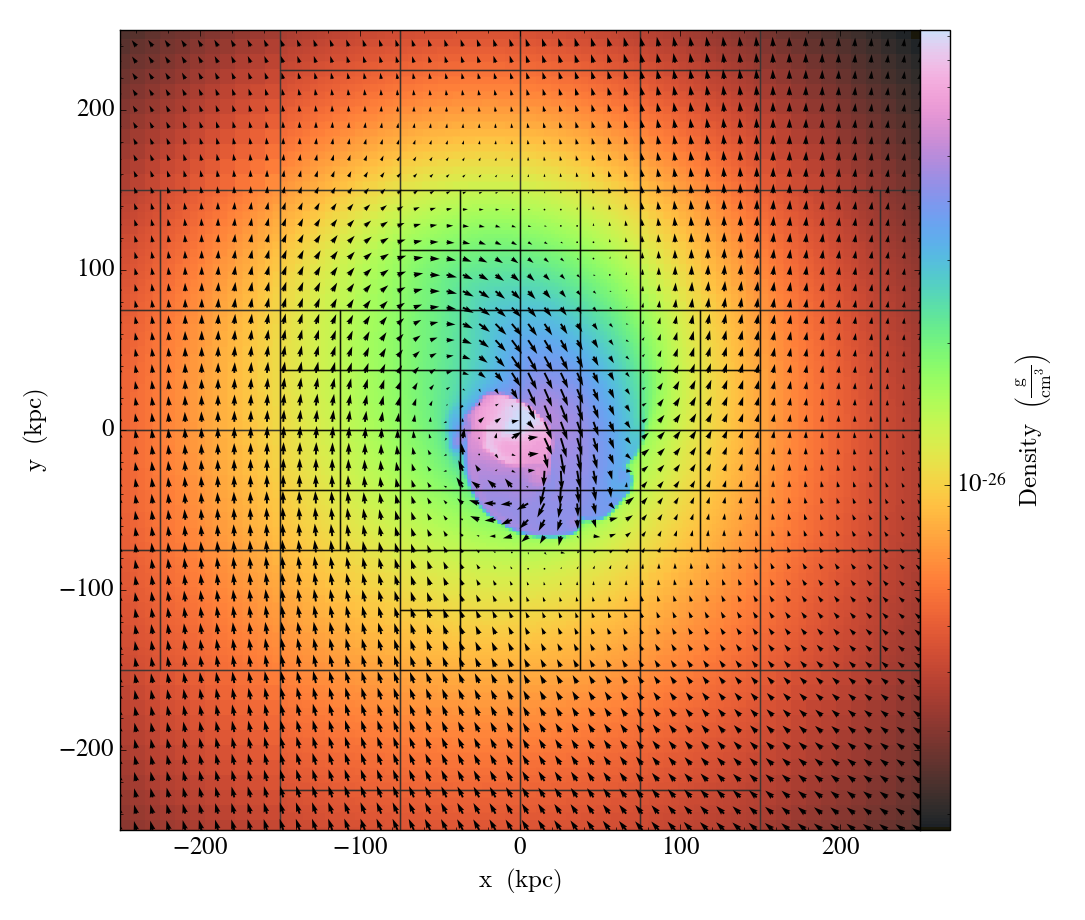

In [8]:
slc.set_cmap("density", "kamae")

To save a plot:

In [ ]:
slc.save("my_awesome_plot.png")

## Images

To create a raw 2D image from a `Slice`, `Proj`, or `Cutting` object, one can create a `FixedResolutionBuffer` object using the `to_frb` method. This is an example of how to create a `FixedResolutionBuffer` from a `Slice`:

In [10]:
slc = YT.Slice(ds, "z", 0.0)
frb = YT.to_frb(slc, (500.,"kpc"), 800)

FixedResolutionBuffer (800x800)


which can be plotted with a plotting package such as [PyPlot](http://github.com/JuliaPy/PyPlot.jl) or :

In [14]:
using Winston

INFO: Precompiling module Cairo.


which yields the following image:

yt : [INFO     ] 2016-12-15 22:02:35,228 Making a fixed resolution buffer of (kT) 800 by 800


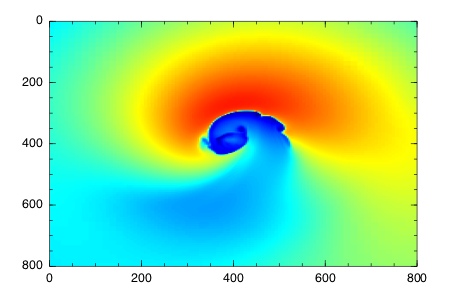

In [15]:
imagesc(frb["kT"].value)